# Data preparation

In [11]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PROJECT_DIR = "/home/sisaev/projects/Gustafsson_et_al_2022"
DATA_DIR = "/home/sisaev/data/thymus_Karin/count"
exec(open(f"{PROJECT_DIR}/tools/tools.py").read())

sc.settings.verbosity = 3
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("white")

## Murine samples

In [7]:
IR_samples = ["SCG_MTH2_IR", "ID_MTH5_IR", "SCG_MTH7_IR"]
control_samples = ["SCG_65", "SCG_MTH2_C", "SCG_MTH3_C", "SCG_MTH4_C"]
aged_samples = ["ID_MTH9_Old_M1", "ID_MTH9_Old_M2", "ID_MTH9_Old_F3", "ID_MTH9_Old_F4"]
IL7ko_samples = ["SCG_MTH3_IL7_C", "ID_MTH5_IL7_C", "SCG_MTH8_IL7_C1", "SCG_MTH8_IL7_C2"]
mouse_samples = control_samples + aged_samples + IR_samples + IL7ko_samples

### Control

In [32]:
adata_control = []

for sample in control_samples:
    adata_tmp = sc.read_10x_h5(f"{DATA_DIR}/mouse/{sample}/outs/filtered_feature_bc_matrix.h5")
    adata_tmp.var_names_make_unique()
    adata_tmp.obs["sample_id"] = sample
    adata_tmp.obs["condition"] = "control"
    adata_tmp.obs.index = [sample + ":" + barcode.split("-")[0] for barcode in adata_tmp.obs.index]
    adata_control.append(adata_tmp.copy())
    
adata_control = adata_control[0].concatenate(adata_control[1:])
adata_control.obs.index = [barcode.split("-")[0] for barcode in adata_control.obs.index]

reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_65/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_MTH2_C/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_MTH3_C/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_MTH4_C/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (

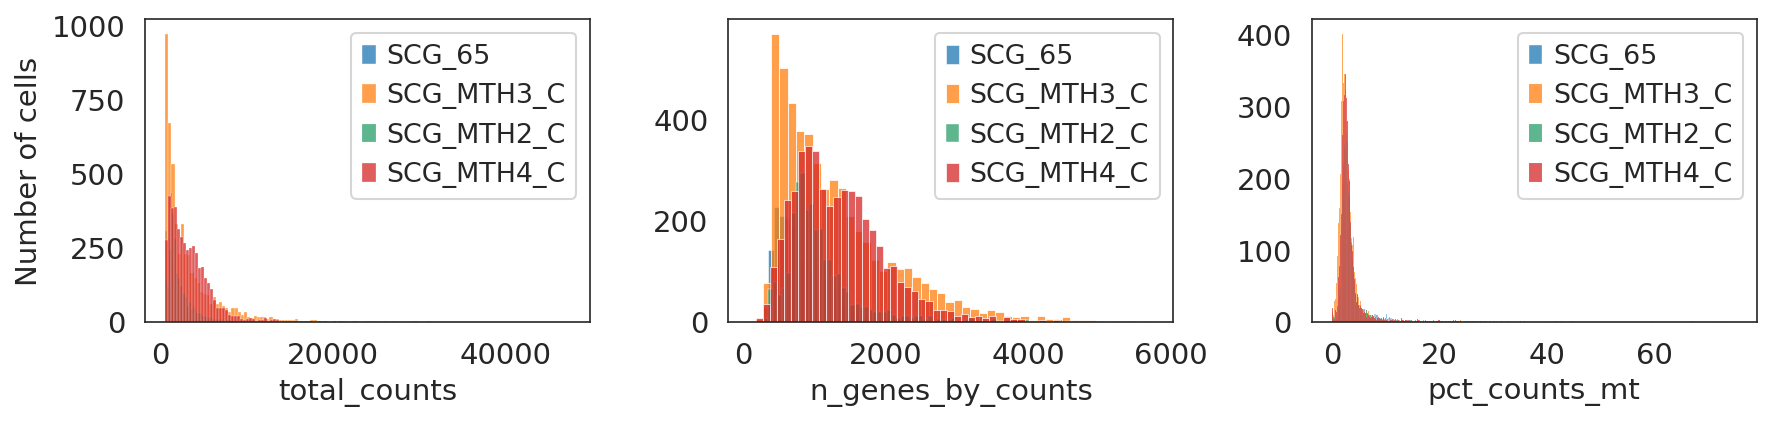

In [33]:
adata_control.var["mt"] = adata_control.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_control, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
qc_plot = QC_histogram(adata_control, split_by="sample_id")

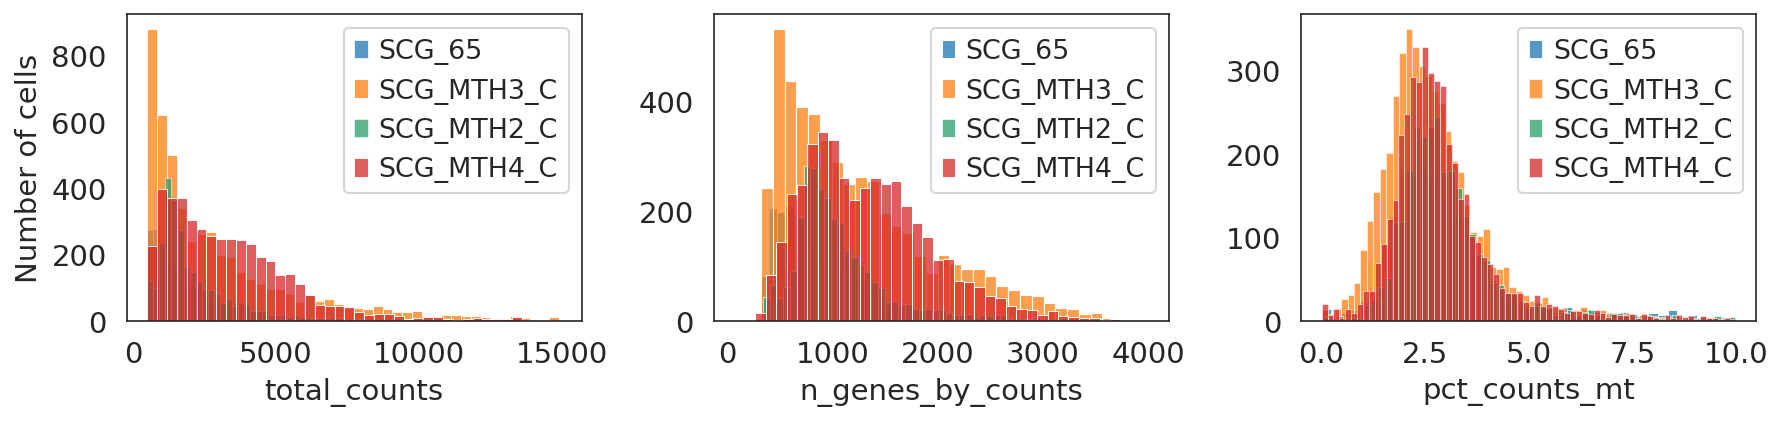

In [43]:
adata_control = adata_control[adata_control.obs.pct_counts_mt < 10]
adata_control = adata_control[adata_control.obs.total_counts < 15000]
qc_plot = QC_histogram(adata_control, split_by="sample_id")

### IR

In [29]:
adata_IR = []

for sample in IR_samples:
    adata_tmp = sc.read_10x_h5(f"{DATA_DIR}/mouse/{sample}/outs/filtered_feature_bc_matrix.h5")
    adata_tmp.var_names_make_unique()
    adata_tmp.obs["sample_id"] = sample
    adata_tmp.obs["condition"] = "irradiated"
    adata_tmp.obs.index = [sample + ":" + barcode.split("-")[0] for barcode in adata_tmp.obs.index]
    adata_IR.append(adata_tmp.copy())
    
adata_IR = adata_IR[0].concatenate(adata_IR[1:])
adata_IR.obs.index = [barcode.split("-")[0] for barcode in adata_IR.obs.index]

reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_MTH2_IR/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/ID_MTH5_IR/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_MTH7_IR/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:03)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


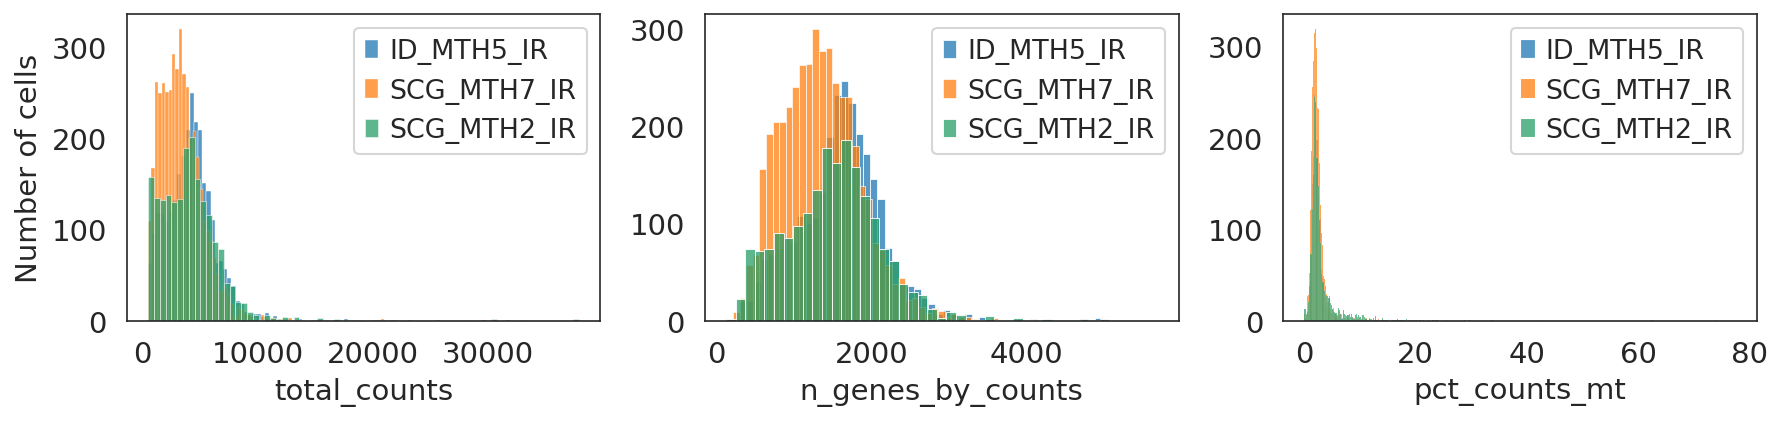

In [31]:
adata_IR.var["mt"] = adata_IR.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_IR, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
qc_plot = QC_histogram(adata_IR, split_by="sample_id")

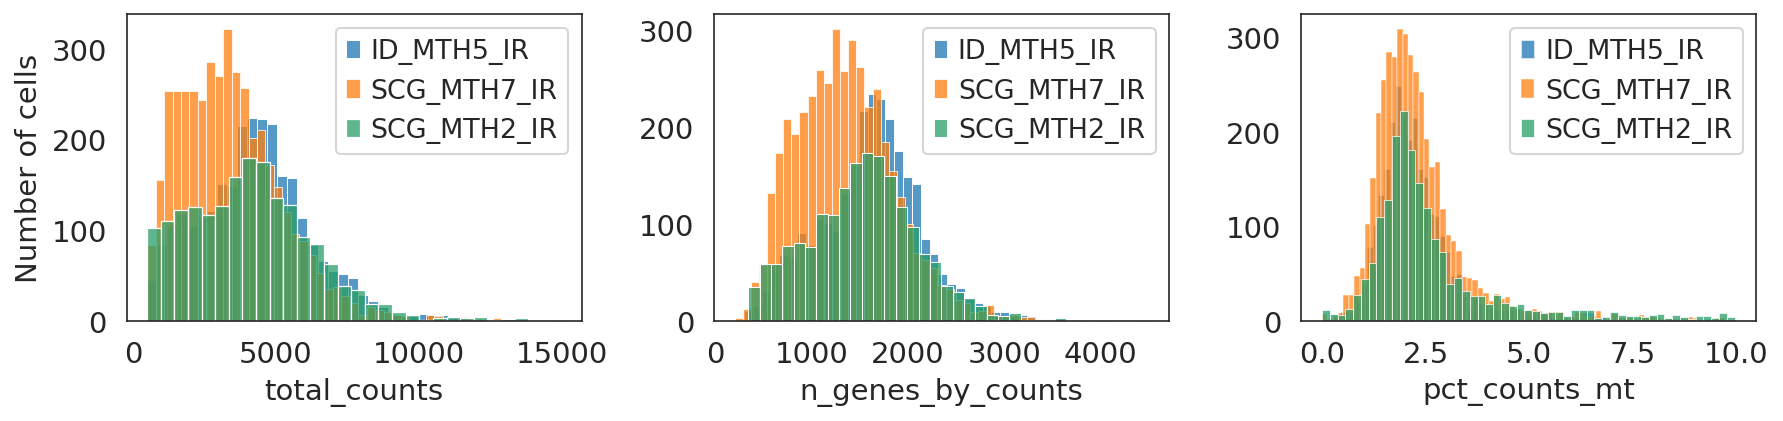

In [44]:
adata_IR = adata_IR[adata_IR.obs.pct_counts_mt < 10]
adata_IR = adata_IR[adata_IR.obs.total_counts < 15000]
qc_plot = QC_histogram(adata_IR, split_by="sample_id")

### Aged

In [37]:
adata_aged = []

for sample in aged_samples:
    adata_tmp = sc.read_10x_h5(f"{DATA_DIR}/mouse/{sample}/outs/filtered_feature_bc_matrix.h5")
    adata_tmp.var_names_make_unique()
    adata_tmp.obs["sample_id"] = sample
    adata_tmp.obs["condition"] = "aged"
    adata_tmp.obs.index = [sample + ":" + barcode.split("-")[0] for barcode in adata_tmp.obs.index]
    adata_aged.append(adata_tmp.copy())
    
adata_aged = adata_aged[0].concatenate(adata_aged[1:])
adata_aged.obs.index = [barcode.split("-")[0] for barcode in adata_aged.obs.index]

reading /home/sisaev/data/thymus_Karin/count/mouse/ID_MTH9_Old_M1/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/ID_MTH9_Old_M2/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:03)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/ID_MTH9_Old_F3/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/ID_MTH9_Old_F4/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_na

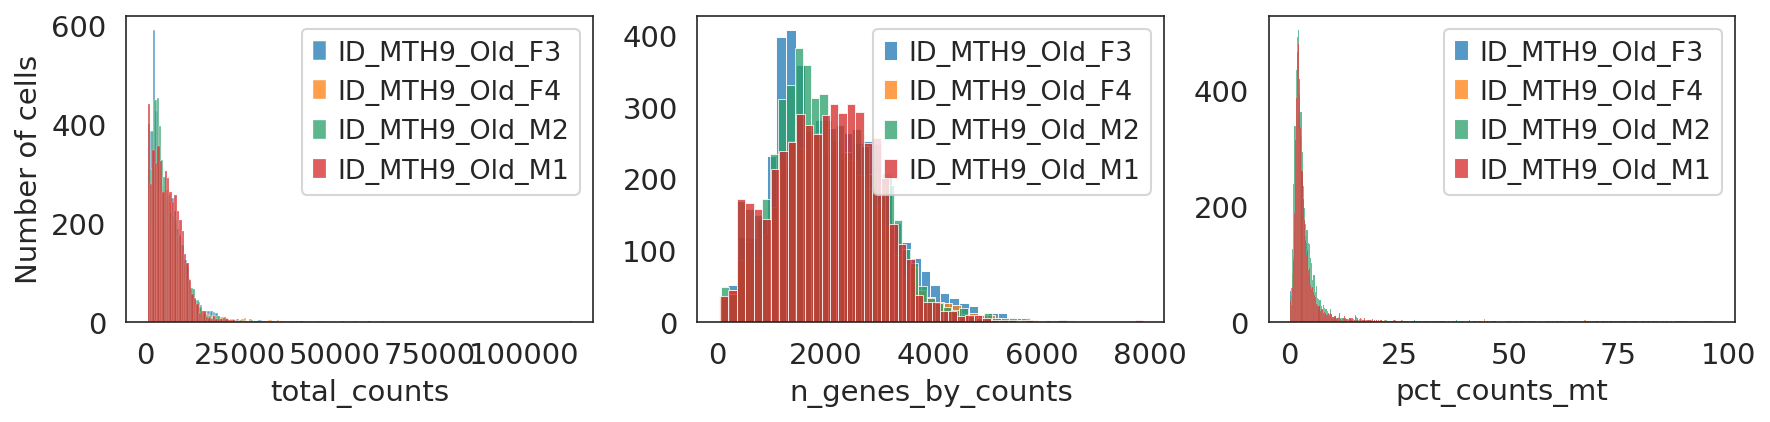

In [38]:
adata_aged.var["mt"] = adata_aged.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_aged, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
qc_plot = QC_histogram(adata_aged, split_by="sample_id")

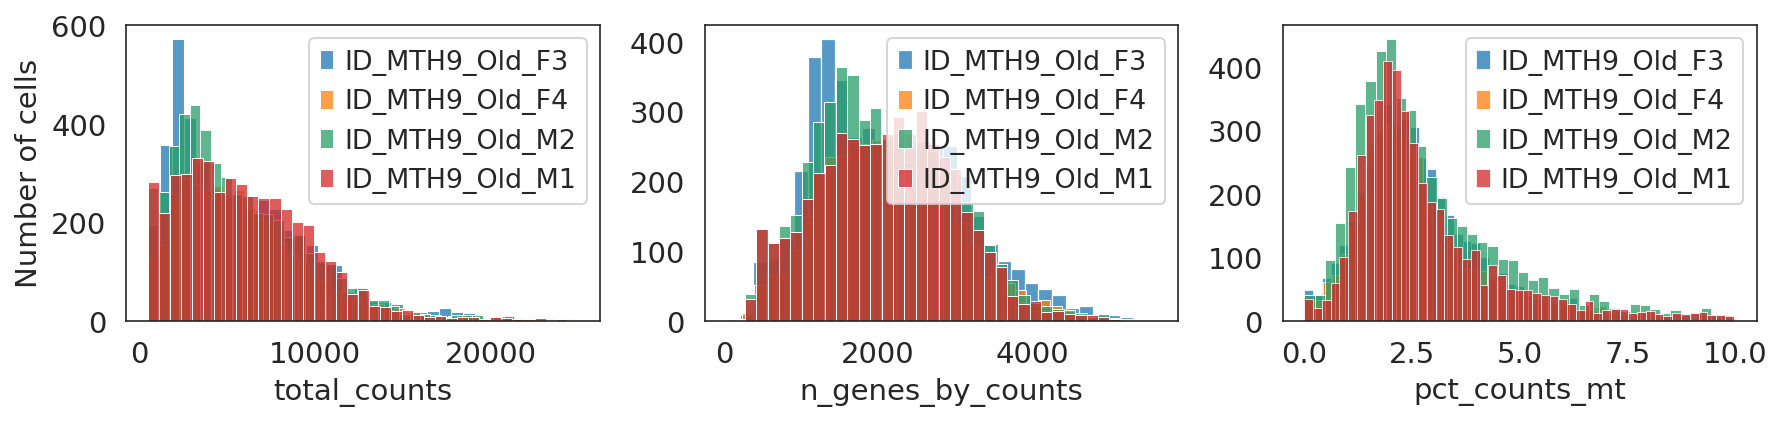

In [46]:
adata_aged = adata_aged[adata_aged.obs.pct_counts_mt < 10]
adata_aged = adata_aged[adata_aged.obs.total_counts < 25000]
qc_plot = QC_histogram(adata_aged, split_by="sample_id")

### IL7ko

In [47]:
adata_IL7ko = []

for sample in IL7ko_samples:
    adata_tmp = sc.read_10x_h5(f"{DATA_DIR}/mouse/{sample}/outs/filtered_feature_bc_matrix.h5")
    adata_tmp.var_names_make_unique()
    adata_tmp.obs["sample_id"] = sample
    adata_tmp.obs["condition"] = "IL7_ko"
    adata_tmp.obs.index = [sample + ":" + barcode.split("-")[0] for barcode in adata_tmp.obs.index]
    adata_IL7ko.append(adata_tmp.copy())
    
adata_IL7ko = adata_IL7ko[0].concatenate(adata_IL7ko[1:])
adata_IL7ko.obs.index = [barcode.split("-")[0] for barcode in adata_IL7ko.obs.index]

reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_MTH3_IL7_C/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/ID_MTH5_IL7_C/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_MTH8_IL7_C1/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:03)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/mouse/SCG_MTH8_IL7_C2/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_n

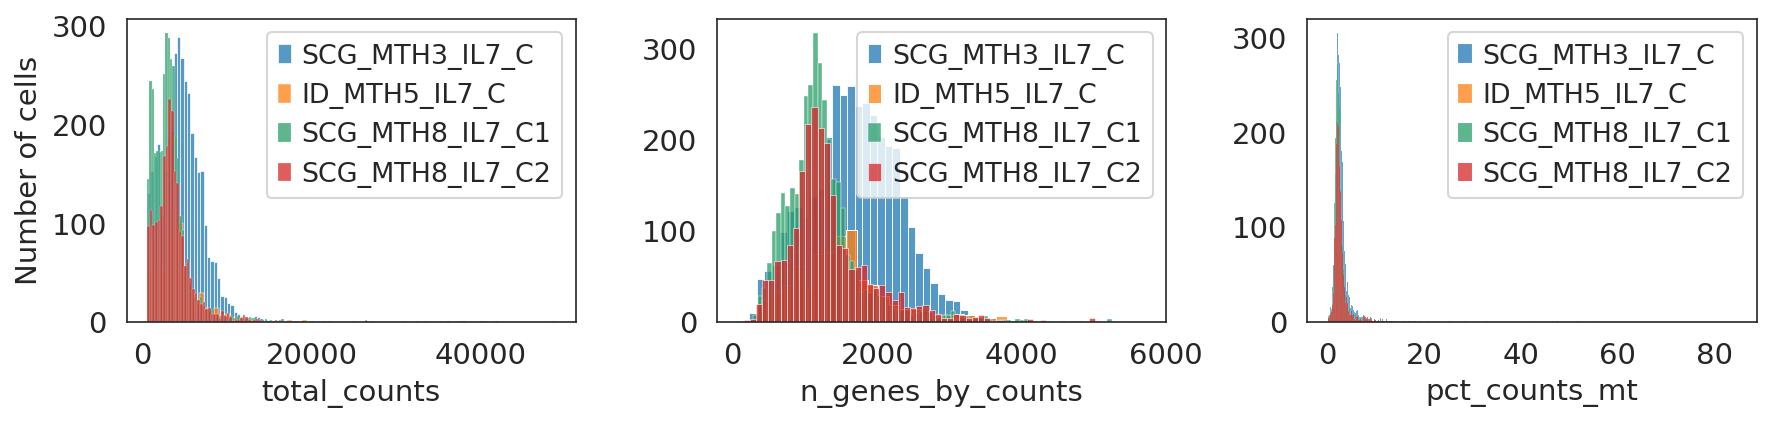

In [48]:
adata_IL7ko.var["mt"] = adata_IL7ko.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_IL7ko, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
qc_plot = QC_histogram(adata_IL7ko, split_by="sample_id")

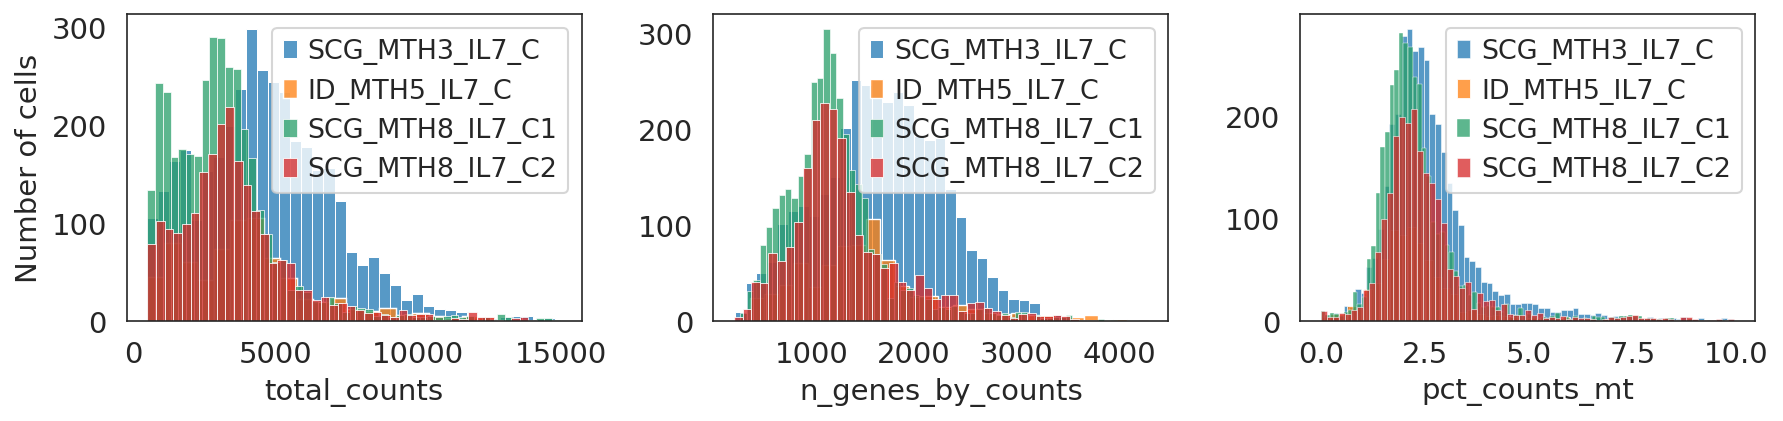

In [51]:
adata_IL7ko = adata_IL7ko[adata_IL7ko.obs.pct_counts_mt < 10]
adata_IL7ko = adata_IL7ko[adata_IL7ko.obs.total_counts < 15000]
qc_plot = QC_histogram(adata_IL7ko, split_by="sample_id")

In [73]:
adata_mouse = adata_control.concatenate([adata_IR, adata_aged, adata_IL7ko])
adata_mouse.obs.index = [barcode.split("-")[0] for barcode in adata_mouse.obs.index]
adata_mouse.layers["counts"] = adata_mouse.X.copy()
find_doublets(adata_mouse, batch_key="sample_id")
print(f"{sum(adata_mouse.obs['predicted_doublet'] == 'True')} doublets were found.")
adata_mouse = adata_mouse[adata_mouse.obs["predicted_doublet"] == "False"]
adata_mouse.write_h5ad(f"{PROJECT_DIR}/data/Mouse_AllCells.h5ad")

534 doublets were found.


## Human samples

In [79]:
human_samples = ["SCG_HTS1_20190722_F", "SCG_HTS1_20200302_M", "SCG_HTS1_20200309_F"]

In [87]:
adata_human = []

for sample in human_samples:
    adata_tmp = sc.read_10x_h5(f"{DATA_DIR}/human/{sample}/outs/filtered_feature_bc_matrix.h5")
    adata_tmp.var_names_make_unique()
    adata_tmp.obs["sample_id"] = sample
    adata_tmp.obs.index = [sample + ":" + barcode.split("-")[0] for barcode in adata_tmp.obs.index]
    adata_human.append(adata_tmp.copy())
    
adata_human = adata_human[0].concatenate(adata_human[1:])
adata_human.obs.index = [barcode.split("-")[0] for barcode in adata_human.obs.index]

reading /home/sisaev/data/thymus_Karin/count/human/SCG_HTS1_20190722_F/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/human/SCG_HTS1_20200302_M/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /home/sisaev/data/thymus_Karin/count/human/SCG_HTS1_20200309_F/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


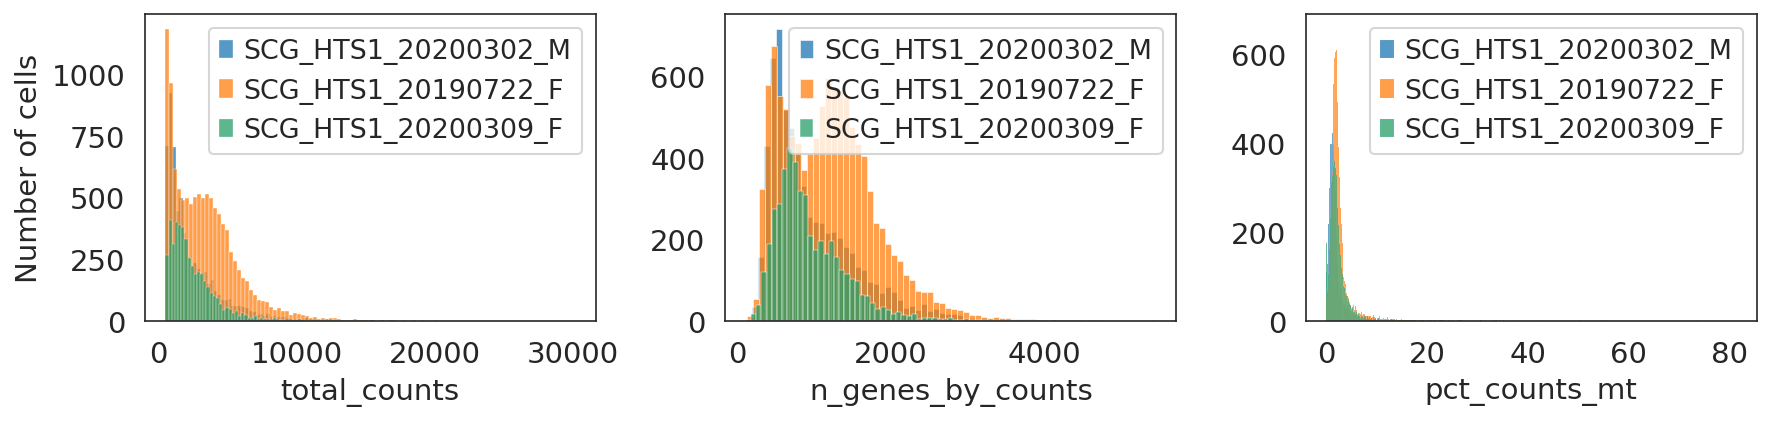

In [88]:
adata_human.var["mt"] = adata_human.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata_human, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
qc_plot = QC_histogram(adata_human, split_by="sample_id")

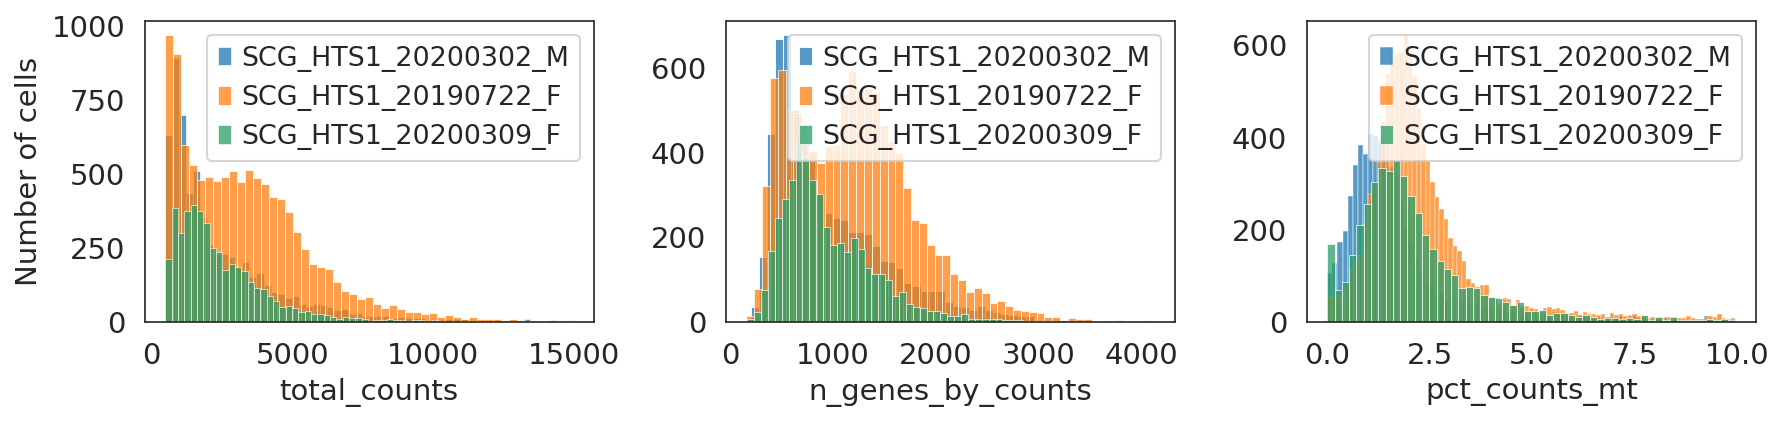

In [89]:
adata_human = adata_human[adata_human.obs.pct_counts_mt < 10]
adata_human = adata_human[adata_human.obs.total_counts < 15000]
qc_plot = QC_histogram(adata_human, split_by="sample_id")

In [90]:
adata_human.layers["counts"] = adata_human.X.copy()
find_doublets(adata_human, batch_key="sample_id")
adata_human = adata_human[adata_human.obs["predicted_doublet"] == "False"]
adata_human.write_h5ad(f"{PROJECT_DIR}/data/Human_AllCells.h5ad")

Batch SCG_HTS1_20200302_M in progress...
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.75
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 10.9%
Elapsed time: 6.6 seconds
Batch SCG_HTS1_20190722_F in progress...
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.31
Detected doublet rate = 4.2%
Estimated detectable doublet fraction = 43.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 9.7%
Elapsed time: 13.2 seconds
Batch SCG_HTS1_20200309_F in progress...
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


/home/sisaev/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 34.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.2%
Elapsed time: 4.7 seconds
537 doublets (of 21576) were found.


... storing 'sample_id' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'genome' as categorical
